In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import numpy as np

In [2]:
!pip install networkx
!pip install matplotlib
!pip install tqdm

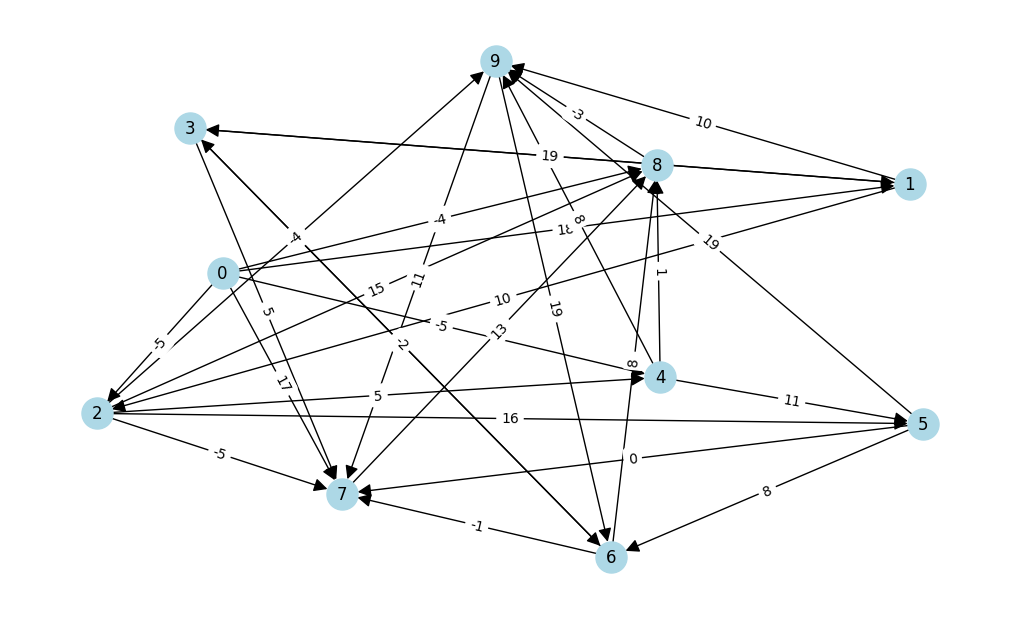

In [28]:
# Randon graph generation

def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

G = gnp_random_connected_graph(10, 0.5, True, True)

In [29]:
# Team 9's implementation
# Transform graph G into adjacency list
# Starting with vertex '0'.

adj_graph = list(nx.to_edgelist(G))
V = len(adj_graph) - 1
start = 0



In [30]:
# Library implementation

from networkx.algorithms import bellman_ford_predecessor_and_distance

In [31]:
# pred is a dictionary of predecessors, dist is a dictionary of distances

try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Negative cycle detected


In [32]:

def bellmanford(graph, V, start):
    # list of shortest dictances
    # first fill dist with inf
    positive_infinity = float('inf')
    dist = [positive_infinity for value in range(V)]
    dist[start] = 0
    
    for i in range(V - 1):
        for edge in graph:
            if (dist[edge[0]] + edge[2]['weight']) < dist[edge[1]]:
                dist[edge[1]] = dist[edge[0]] + edge[2]['weight']
                
    # run algorithm one more time to detect nodes
    # that are part of negative cycles.
    negative_infinity = float('-inf')
    for j in range(V - 1):
        for edge in graph:
            if (dist[edge[0]] + edge[2]['weight']) < dist[edge[1]]:
                dist[edge[1]] = negative_infinity
    
    return dist

In [33]:
d = bellmanford(adj_graph, V, start)

if float('-inf') in d:
    print('Negative cycle detected')
else:
    for i in range(V):
        if d[i] == float('inf'):
            continue
        print(start, 'to', i, '=', d[i])

Negative cycle detected


In [58]:
# Time comparison of library vs Team 9 implementations
from tqdm import tqdm
import time

def measure_time_1(vertices): 
    ''' 
    Measures the time of the algorithm. 
    ''' 
    NUM_OF_ITERATIONS = 2 
    time_taken = 0 
    for i in tqdm(range(NUM_OF_ITERATIONS)): 
        G = gnp_random_connected_graph(vertices, 0.4, False) 
        start = time.time()
        try:
            pred, dist = bellman_ford_predecessor_and_distance(G, 0)
            for k, v in dist.items():
                print(f"Distance to {k}:", v)
        except:
            print("Negative cycle detected")
        end = time.time() 
        time_taken += end - start
 
    return time_taken / NUM_OF_ITERATIONS

def measure_time_2(algorithm, vertices): 
    ''' 
    Measures the time of the algorithm. 
    ''' 
    NUM_OF_ITERATIONS = 2 
    time_taken = 0 
    for i in tqdm(range(NUM_OF_ITERATIONS)): 
        G = gnp_random_connected_graph(vertices, 0.4, False)
        adj_graph = list(nx.to_edgelist(G))
        V = len(adj_graph) - 1
        start = time.time() 
        list_1 = algorithm(adj_graph, V, 0)
        if float('-inf') and float('inf') in list_1:
            print('Negative cycle detected')
        end = time.time() 
         
        time_taken += end - start
    print(list_1)
        
 
    return time_taken / NUM_OF_ITERATIONS
 
def visualization(algoritm): 
    ''' 
    Visualize the time of two algoritms. 
    ''' 
    vertices = [i for i in range(10, 100, 10)] 
    y = [] 
    time1 = [] 
    time2 = [] 
    for i in vertices: 
        time1.append(measure_time_1(i)) 
        time2.append(measure_time_2(algoritm, i)) 
        y.append(i) 
    plt.plot(time1, y, label='Our') 
    plt.plot(time2, y, label='Built-in') 
    plt.legend() 
    return plt.show()

In [59]:
# Measurements and visualization

print(measure_time_1(10)) # Library
print(measure_time_2(bellmanford, 10)) # Non-library

100%|██████████| 2/2 [00:00<00:00, 645.97it/s]


Negative cycle detected
Negative cycle detected
0.0009710788726806641


100%|██████████| 2/2 [00:00<00:00, 880.32it/s]

[0, -1, 0, 11, 9, 18, -1, inf, 5, 13, inf, inf, inf, inf, inf, inf, inf, inf, inf]
0.000400543212890625


100%|██████████| 2/2 [00:00<00:00, 550.65it/s]


Negative cycle detected
Negative cycle detected


100%|██████████| 2/2 [00:00<00:00, 622.30it/s]


[0, 17, 12, -5, 3, -2, -2, 2, 3, -5, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


100%|██████████| 2/2 [00:00<00:00, 122.86it/s]


Negative cycle detected
Negative cycle detected


100%|██████████| 2/2 [00:00<00:00, 83.21it/s]


[0, inf, 7, -4, 16, 24, 2, 33, 6, -5, -5, 4, -9, -6, -5, -9, -7, -10, -12, -10, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


100%|██████████| 2/2 [00:00<00:00, 67.59it/s]


Negative cycle detected
Negative cycle detected


100%|██████████| 2/2 [00:00<00:00, 29.99it/s]


[0, inf, 13, 5, -1, -5, 12, inf, -5, 6, -6, -9, -6, -10, -6, 0, -9, -6, -11, -11, -4, -11, -13, -13, -9, -12, -4, -10, -18, -15, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


  0%|          | 0/2 [00:00<?, ?it/s]

Negative cycle detected


100%|██████████| 2/2 [00:00<00:00, 30.33it/s]


Negative cycle detected


100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


[0, inf, inf, inf, inf, inf, inf, inf, inf, -2, inf, inf, 2, -5, 15, -1, -1, 5, 7, 6, 8, -6, -1, 8, -5, 10, -6, 1, -10, -10, 3, -5, -14, -7, -9, -15, -10, -20, -24, -10, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 

100%|██████████| 2/2 [00:00<00:00, 19.54it/s]


Negative cycle detected
Negative cycle detected


100%|██████████| 2/2 [00:00<00:00,  4.01it/s]


[0, inf, 5, 16, 22, 1, inf, inf, 2, -1, 1, 0, 3, 21, 7, -3, 0, 9, 5, -3, -2, 3, -1, -5, 7, -2, -5, 3, 1, -6, -10, -7, 8, -14, -8, -12, -6, -13, -6, -5, -12, -10, -10, -4, -11, -13, -9, -11, -15, -18, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 

100%|██████████| 2/2 [00:00<00:00, 13.03it/s]


Negative cycle detected
Negative cycle detected


100%|██████████| 2/2 [00:01<00:00,  1.84it/s]


[0, inf, 10, 5, 28, 23, 6, 7, 21, 17, -4, 21, 32, -1, 6, 1, 0, 9, 1, 8, -2, -3, -1, 9, -7, 2, 1, 1, 0, 5, 1, -7, -4, -12, -12, -9, -3, -7, -7, -15, -9, -8, -11, -13, -9, -17, -20, -23, -15, -22, -18, -21, -18, -12, -7, -26, -23, -25, -25, -28, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, i

 50%|█████     | 1/2 [00:00<00:00,  7.90it/s]

Negative cycle detected


100%|██████████| 2/2 [00:00<00:00,  9.27it/s]


Negative cycle detected


100%|██████████| 2/2 [00:01<00:00,  1.02it/s]


[0, inf, 12, 31, 17, inf, 12, 11, 7, 11, 11, -3, 14, 9, -1, -5, 4, -2, 0, 7, -5, 2, -4, 3, 2, -3, -4, -5, -9, -5, -4, -10, -10, -9, -10, -11, -3, -8, -13, -11, -9, -14, -13, -13, -9, -11, -11, -15, -15, -10, -16, -16, -15, -16, -13, -14, -16, -20, -18, -17, -18, -13, -13, -19, -18, -18, -18, -13, -19, -23, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, in

  0%|          | 0/2 [00:00<?, ?it/s]

Negative cycle detected

100%|██████████| 2/2 [00:00<00:00,  5.78it/s]



Negative cycle detected


100%|██████████| 2/2 [00:03<00:00,  1.95s/it]


[0, 2, inf, 6, 21, 18, 6, 7, 13, -3, 16, 3, 8, 11, 10, -1, -7, 5, 2, -1, 8, 14, -2, -5, -8, -5, -5, -6, 3, -2, -8, -5, -6, -11, -12, -14, -10, -13, -11, -4, -9, -3, -14, -17, -5, -19, -15, -10, -16, -21, -20, -21, -16, -17, -24, -17, -21, -23, -22, -20, -20, -20, -28, -25, -25, -27, -30, -35, -32, -37, -27, -34, -39, -30, -38, -34, -41, -41, -43, -44, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, i

 50%|█████     | 1/2 [00:00<00:00,  4.01it/s]

Negative cycle detected


100%|██████████| 2/2 [00:00<00:00,  4.14it/s]


Negative cycle detected


100%|██████████| 2/2 [00:06<00:00,  3.32s/it]


[0, inf, inf, inf, inf, -5, 7, 19, -5, -6, -8, 0, 5, -5, -5, 8, -12, -6, -5, -15, 5, -7, -7, -10, -4, -11, -18, -17, -9, -11, -15, -20, -13, -11, -6, -10, -23, -17, -14, -12, -18, -27, -14, -8, -12, -19, -17, -16, -21, -28, -32, -31, -22, -17, -26, -31, -26, -30, -28, -30, -33, -30, -32, -32, -25, -33, -30, -34, -31, -29, -38, -39, -34, -33, -37, -36, -30, -42, -33, -35, -37, -35, -37, -39, -41, -39, -36, -44, -45, -44, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, i

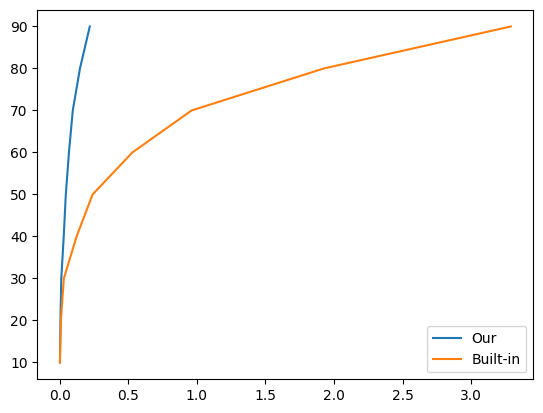

In [60]:
visualization(bellmanford)